This notebook analyzes the results from the aspiration classifiers which were built based on the entire microbial communities and those which were built based only on the exchanged OTUs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import ranksums

# to pretty print dataframes
from IPython.display import display

sns.set_style('white')

# Classifiers based on entire communities

In [2]:
# Classifiers
fnclssum = '/Users/claire/github/aspiration-analysis/data/analysis/rf_results.summary_stats.txt'
fnclsroc = '/Users/claire/github/aspiration-analysis/data/analysis/rf_results.rocs.txt'

summary = pd.read_csv(fnclssum, sep='\t')
rocs = pd.read_csv(fnclsroc, sep='\t')

summary['log_fisher_p'] = np.log10(summary['fisher_p'])

In [3]:
summary.head()

,N_asp,N_nml,auc,fisher_p,iteration,npv,ppv,sensitivity,sites,specificity,log_fisher_p
0,33,33,0.621429,0.076922,0,0.653846,0.600000,0.727273,bal,0.515152,-1.113947
1,33,33,0.708617,0.127142,1,0.640000,0.585366,0.727273,bal,0.484848,-0.895711
2,33,33,0.602608,0.120279,2,0.652174,0.581395,0.757576,bal,0.454545,-0.919812
3,33,33,0.657029,0.455303,3,0.571429,0.552632,0.636364,bal,0.484848,-0.341699
4,33,33,0.673243,0.046394,4,0.655172,0.621622,0.696970,bal,0.575758,-1.333536


## Main text info

In the main text, we'll just report the mean AUC and p-values for relevant comparisons.

In [4]:
## Mean AUCs
order = ['bal', 'throat_swab', 'gastric_fluid', 
         'bal-throat_swab', 'bal-gastric_fluid', 'throat_swab-gastric_fluid',
         'bal-throat_swab-gastric_fluid']
summary.groupby('sites').mean().loc[order, ['auc', 'fisher_p', 'N_nml', 'N_asp']]

,auc,fisher_p,N_nml,N_asp
sites,,,,
bal,0.662861,0.201127,33.0,33.0
throat_swab,0.708091,0.022594,43.0,36.0
gastric_fluid,0.668389,0.105573,48.0,41.0
bal-throat_swab,0.805990,0.012518,23.0,25.0
bal-gastric_fluid,0.697364,0.070802,28.0,29.0
throat_swab-gastric_fluid,0.757558,0.015925,35.0,32.0
bal-throat_swab-gastric_fluid,0.826762,0.014796,19.0,23.0


In [5]:
## Does gastric fluid add any value?
# Compare throat_swab vs. throat_swab-gastric_fluid
s1 = 'throat_swab'
s2 = 'throat_swab-gastric_fluid'
print(' + '.join([s1, s2]))
print(ranksums(summary.query('sites == @s1')['auc'], summary.query('sites == @s2')['auc']))
print('')

# Compare bal vs. bal-gastric_fluid
s1 = 'bal'
s2 = 'bal-gastric_fluid'
print(' + '.join([s1, s2]))
print(ranksums(summary.query('sites == @s1')['auc'], summary.query('sites == @s2')['auc']))
print('')

# Compare bal-throat_swab vs. bal-throat_swab-gastric_fluid
s1 = 'bal-throat_swab'
s2 = 'bal-throat_swab-gastric_fluid'
print(' + '.join([s1, s2]))
print(ranksums(summary.query('sites == @s1')['auc'], summary.query('sites == @s2')['auc']))
print('')

## Does combining bal and throat_swab add value?
# Compare bal vs. bal-throat_swab
s1 = 'bal'
s2 = 'bal-throat_swab'
print(' + '.join([s1, s2]))
print(ranksums(summary.query('sites == @s1')['auc'], summary.query('sites == @s2')['auc']))
print('')

# Compare throat_swab vs. bal-throat_swab
s1 = 'throat_swab'
s2 = 'bal-throat_swab'
print(' + '.join([s1, s2]))
print(ranksums(summary.query('sites == @s1')['auc'], summary.query('sites == @s2')['auc']))
print('')


throat_swab + throat_swab-gastric_fluid
RanksumsResult(statistic=-9.801654520706368, pvalue=1.107563884250821e-22)

bal + bal-gastric_fluid
RanksumsResult(statistic=-6.0461658011935455, pvalue=1.4833344971021926e-09)

bal-throat_swab + bal-throat_swab-gastric_fluid
RanksumsResult(statistic=-4.327241719100331, pvalue=1.5098823523813074e-05)

bal + bal-throat_swab
RanksumsResult(statistic=-12.209614268969144, pvalue=2.7619548486352597e-34)

throat_swab + bal-throat_swab
RanksumsResult(statistic=-12.041020435757442, pvalue=2.162638100761756e-33)



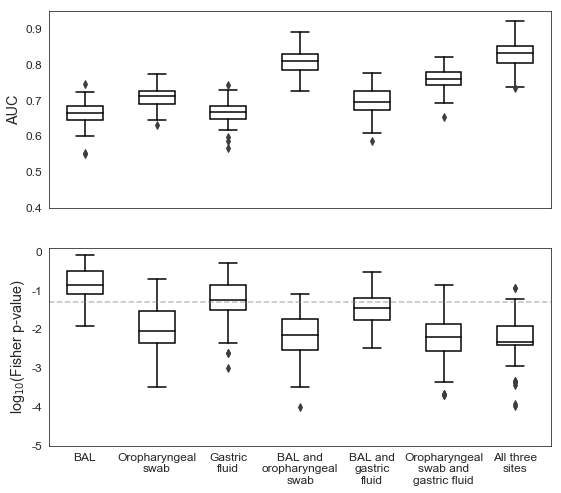

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(9, 8))

## Set up some stuff
boxprops = {'edgecolor': 'k', 'facecolor': 'w'}
lineprops = {'color': 'k'}

xlabels = {'bal': 'BAL', 
           'throat_swab': 'Oropharyngeal\nswab',
           'gastric_fluid': 'Gastric\nfluid',
           'bal-throat_swab': 'BAL and\noropharyngeal\nswab',
           'bal-gastric_fluid': 'BAL and\ngastric\nfluid',
           'throat_swab-gastric_fluid': 'Oropharyngeal\nswab and\ngastric fluid',
           'bal-throat_swab-gastric_fluid': 'All three\nsites'}


## AUCs
sns.boxplot(x='sites', y='auc', data=summary, ax=ax[0], width=0.5,
            **{'boxprops': boxprops, 'medianprops': lineprops,
               'whiskerprops': lineprops, 'capprops': lineprops})
## Plot AUC = 0.7
#ax[0].plot(ax[0].get_xlim(), 2*[0.7], '--', color='gray', alpha=0.5)

# Axes
ax[0].set_ylim([0.4, 0.95])

# Labels
ax[0].set_ylabel('AUC', fontsize='x-large')
yticks = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ax[0].set_yticks(yticks)
ax[0].set_yticklabels(yticks, fontsize='large')

ax[0].set_xticklabels('')
ax[0].set_xlabel('')

## Fisher pvalues
sns.boxplot(x='sites', y='log_fisher_p', data=summary, ax=ax[1], width=0.5,
            **{'boxprops': boxprops, 'medianprops': lineprops,
               'whiskerprops': lineprops, 'capprops': lineprops})
# Plot p = 0.05
ax[1].plot(ax[1].get_xlim(), 2*[np.log10(0.05)], '--', color='gray', alpha=0.5)

# Labels
ax[1].set_ylabel('log$_{10}$(Fisher p-value)', fontsize='x-large')
yticks = [-5, -4, -3, -2, -1, 0]
ax[1].set_ylim([-5, 0.1])
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(yticks, fontsize='large')

ax[1].set_xticklabels([xlabels[i.get_text()] for i in ax[1].get_xticklabels()],
                  fontsize='large')
ax[1].set_xlabel('')

fig.savefig('../../final/figures/figure9.auc_fisherp_asp_classifiers.png', dpi=200)

# Classifiers built on exchanged OTUs

In [7]:
# Classifiers
fnclssum = '/Users/claire/github/aspiration-analysis/data/analysis/rf_results.exchanged.summaries.txt'
fnclsroc = '/Users/claire/github/aspiration-analysis/data/analysis/rf_results.exchanged.rocs.txt'

summary = pd.read_csv(fnclssum, sep='\t')
rocs = pd.read_csv(fnclsroc, sep='\t')

summary['log_fisher_p'] = np.log10(summary['fisher_p'])

In [8]:
summary.head()

,N_asp,N_nml,auc,cls_type,fisher_p,iteration,n_feats,npv,ppv,sensitivity,sites,specificity,log_fisher_p
0,33,33,0.587358,abundance,0.324842,0,12,0.575758,0.575758,0.575758,bal,0.575758,-0.488328
1,33,33,0.626134,abundance,0.138369,1,12,0.612903,0.600000,0.636364,bal,0.575758,-0.858961
2,33,33,0.626474,abundance,0.044280,2,12,0.666667,0.615385,0.727273,bal,0.545455,-1.353795
3,33,33,0.597846,abundance,0.323951,3,12,0.580645,0.571429,0.606061,bal,0.545455,-0.489521
4,33,33,0.596372,abundance,0.212743,4,12,0.607143,0.578947,0.666667,bal,0.515152,-0.672144


In [9]:
## Mean AUCs
order = ['bal', 'throat_swab', 'gastric_fluid', 
         'bal-throat_swab', 'bal-gastric_fluid', 'throat_swab-gastric_fluid',
         'bal-throat_swab-gastric_fluid']
# I forgot to include a column indicating which exchanged OTUs this was based off of,
# but you can infer it from the n_feats column.
# n_feats = 9 or 18 corresponds to bal-throat exchanged OTUs
# n_feats = 48 or 96 corresponds to bal-gastric exchanged OTUs
summary.groupby(['cls_type', 'n_feats', 'sites']).mean()[['auc', 'fisher_p', 'N_nml', 'N_asp']]

auc  fisher_p  N_nml  N_asp
cls_type  n_feats sites                                              
abundance 12      bal                0.593722  0.309167   33.0   33.0
                  throat_swab        0.651492  0.113191   43.0   36.0
          24      bal-throat_swab    0.739980  0.127877   23.0   25.0
          72      bal                0.613495  0.385172   33.0   33.0
                  gastric_fluid      0.679747  0.044481   48.0   41.0
          144     bal-gastric_fluid  0.709804  0.074050   28.0   29.0
presence  12      bal                0.632596  0.265749   33.0   33.0
                  bal-throat_swab    0.666650  0.170783   23.0   25.0
                  throat_swab        0.478069  0.615996   43.0   36.0
          72      bal                0.642425  0.159584   33.0   33.0
                  bal-gastric_fluid  0.568944  0.711530   28.0   29.0
                  gastric_fluid      0.663254  0.047094   48.0   41.0

Text(0.5,1,'Lung-gastric OTUs')

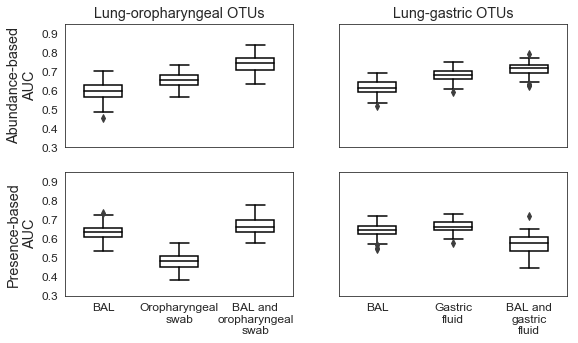

In [14]:
## Plot AUCs
fig, ax = plt.subplots(2, 2, figsize=(9, 5))

## Set up some stuff
boxprops = {'edgecolor': 'k', 'facecolor': 'w'}
lineprops = {'color': 'k'}

# Top left: lung-throat exchanged, abundance
notus = [12, 24]
tmp = summary.query('n_feats == @notus').query('cls_type == "abundance"')

sns.boxplot(x='sites', y='auc', data=tmp, ax=ax[0, 0], width=0.5,
            **{'boxprops': boxprops, 'medianprops': lineprops,
               'whiskerprops': lineprops, 'capprops': lineprops})

# Bottom left: lung-throat, presence
tmp = summary.query('n_feats == @notus').query('cls_type == "presence"')
sns.boxplot(x='sites', y='auc', data=tmp, ax=ax[1, 0], width=0.5,
            **{'boxprops': boxprops, 'medianprops': lineprops,
               'whiskerprops': lineprops, 'capprops': lineprops})

# Top right: lung-gastric, abundance
notus = [72, 144]
tmp = summary.query('n_feats == @notus').query('cls_type == "abundance"')
sns.boxplot(x='sites', y='auc', data=tmp, ax=ax[0, 1], width=0.5,
            **{'boxprops': boxprops, 'medianprops': lineprops,
               'whiskerprops': lineprops, 'capprops': lineprops})

# Bottom right: lung-gastric, presence
tmp = summary.query('n_feats == @notus').query('cls_type == "presence"')
sns.boxplot(x='sites', y='auc', data=tmp, ax=ax[1, 1], width=0.5,
            **{'boxprops': boxprops, 'medianprops': lineprops,
               'whiskerprops': lineprops, 'capprops': lineprops})

# Set all same ylims
[a.set_ylim([0.3, 0.95]) for a in ax.flatten()]

# Y axes
ax[0, 0].set_yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax[0, 0].set_yticklabels(ax[0, 0].get_yticks(), fontsize='large')
ax[0, 0].set_ylabel('Abundance-based\nAUC', fontsize='x-large')
ax[1, 0].set_yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax[1, 0].set_yticklabels(ax[0, 0].get_yticks(), fontsize='large')
ax[1, 0].set_ylabel('Presence-based\nAUC', fontsize='x-large')
ax[0, 1].set_yticks([])
ax[0, 1].set_ylabel('')
ax[1, 1].set_yticks([])
ax[1, 1].set_ylabel('')

# X axes
labeldict = {'bal': 'BAL', 
            'throat_swab': 'Oropharyngeal\nswab',
            'gastric_fluid': 'Gastric\nfluid',
            'bal-throat_swab': 'BAL and\noropharyngeal\nswab',
            'bal-gastric_fluid': 'BAL and\ngastric\nfluid',
            'throat_swab-gastric_fluid': 'Oropharyngeal\nswab and\ngastric fluid'}
ax[0, 0].set_xlabel('')
ax[0, 0].set_xticklabels('')
ax[0, 1].set_xlabel('')
ax[0, 1].set_xticklabels('')
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')

ax[1, 0].set_xticklabels(
    [labeldict[i.get_text()] for i in ax[1, 0].get_xticklabels()],
    fontsize='large')
ax[1, 1].set_xticklabels(
    [labeldict[i.get_text()] for i in ax[1, 1].get_xticklabels()],
    fontsize='large')

# Column labels
ax[0, 0].set_title('Lung-oropharyngeal OTUs', fontsize='x-large')
ax[0, 1].set_title('Lung-gastric OTUs', fontsize='x-large')

fig.savefig('../../final/figures/figure7.auc_asp_classifiers.exchangedOTUs.png', dpi=200)

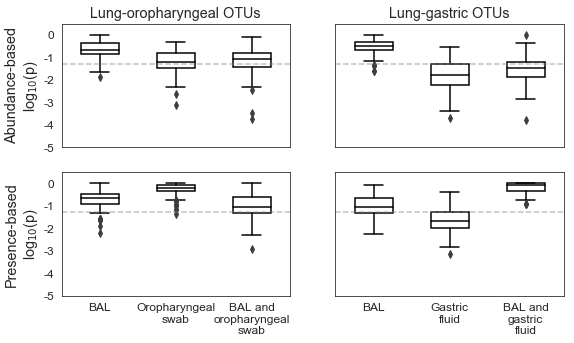

In [15]:
## Plot Fisher p values
fig, ax = plt.subplots(2, 2, figsize=(9, 5))

## Set up some stuff
boxprops = {'edgecolor': 'k', 'facecolor': 'w'}
lineprops = {'color': 'k'}

# Top left: lung-throat exchanged, abundance
notus = [12, 24]
tmp = summary.query('n_feats == @notus').query('cls_type == "abundance"')
sns.boxplot(x='sites', y='log_fisher_p', data=tmp, ax=ax[0, 0], width=0.5,
            **{'boxprops': boxprops, 'medianprops': lineprops,
               'whiskerprops': lineprops, 'capprops': lineprops})

# Bottom left: lung-throat, presence
tmp = summary.query('n_feats == @notus').query('cls_type == "presence"')
sns.boxplot(x='sites', y='log_fisher_p', data=tmp, ax=ax[1, 0], width=0.5,
            **{'boxprops': boxprops, 'medianprops': lineprops,
               'whiskerprops': lineprops, 'capprops': lineprops})

# Top right: lung-gastric, abundance
notus = [72, 144]
tmp = summary.query('n_feats == @notus').query('cls_type == "abundance"')
sns.boxplot(x='sites', y='log_fisher_p', data=tmp, ax=ax[0, 1], width=0.5,
            **{'boxprops': boxprops, 'medianprops': lineprops,
               'whiskerprops': lineprops, 'capprops': lineprops})

# Bottom right: lung-gastric, presence
tmp = summary.query('n_feats == @notus').query('cls_type == "presence"')
sns.boxplot(x='sites', y='log_fisher_p', data=tmp, ax=ax[1, 1], width=0.5,
            **{'boxprops': boxprops, 'medianprops': lineprops,
               'whiskerprops': lineprops, 'capprops': lineprops})

# Set all same ylims
[a.set_ylim([-5, 0.5]) for a in ax.flatten()]

# Plot p = 0.05
[a.plot(
    a.get_xlim(), 2*[np.log10(0.05)], '--', color='gray', alpha=0.5) 
 for a in ax.flatten()]

# Y axes

ax[0, 0].set_yticks([-5, -4, -3, -2, -1, 0])
ax[0, 0].set_yticklabels(ax[0, 0].get_yticks(), fontsize='large')
ax[0, 0].set_ylabel('Abundance-based\nlog$_{10}$(p)', fontsize='x-large')
ax[1, 0].set_yticks([-5, -4, -3, -2, -1, 0])
ax[1, 0].set_yticklabels(ax[0, 0].get_yticks(), fontsize='large')
ax[1, 0].set_ylabel('Presence-based\nlog$_{10}$(p)', fontsize='x-large')
ax[0, 1].set_yticks([])
ax[0, 1].set_ylabel('')
ax[1, 1].set_yticks([])
ax[1, 1].set_ylabel('')


# X axes
labeldict = {'bal': 'BAL', 
            'throat_swab': 'Oropharyngeal\nswab',
            'gastric_fluid': 'Gastric\nfluid',
            'bal-throat_swab': 'BAL and\noropharyngeal\nswab',
            'bal-gastric_fluid': 'BAL and\ngastric\nfluid',
            'throat_swab-gastric_fluid': 'Oropharyngeal\nswab and\ngastric fluid'}
ax[0, 0].set_xlabel('')
ax[0, 0].set_xticklabels('')
ax[0, 1].set_xlabel('')
ax[0, 1].set_xticklabels('')
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')

ax[1, 0].set_xticklabels(
    [labeldict[i.get_text()] for i in ax[1, 0].get_xticklabels()],
    fontsize='large')
ax[1, 1].set_xticklabels(
    [labeldict[i.get_text()] for i in ax[1, 1].get_xticklabels()],
    fontsize='large')

# Column labels
ax[0, 0].set_title('Lung-oropharyngeal OTUs', fontsize='x-large')
ax[0, 1].set_title('Lung-gastric OTUs', fontsize='x-large')

fig.savefig('../../final/figures/figure8.fisherp_asp_classifiers.exchangedOTUs.png', dpi=200)